In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_train=pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values #taking one coluns, based on it we are gonna predict

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
x_train=[]
y_train=[]

In [ ]:
#assiging x_train & y_train
for i in range(60,1258): #1258 = total no of rows
  x_train.append(training_set_scaled[i-60:i,0]) #i=60; i-60== 60-60 i.e., 0 to 60 'i-60:i' == 0th row to 60th row; '0' == 1st col. #1st 60 data is given into x_train
  y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
gru=Sequential()

In [ ]:
from keras.layers import Dense, LSTM, GRU

In [ ]:
gru.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
gru.add(Dropout(0.2))
gru.add(GRU(units=50, return_sequences=True, activation='tanh'))
gru.add(Dropout(0.2))
gru.add(GRU(units=50, return_sequences=True,activation='tanh'))
gru.add(Dropout(0.2))
gru.add(GRU(units=50, activation='tanh'))
gru.add(Dropout(0.2))
gru.add(Dense(units=1))

In [ ]:
from keras.optimizers import SGD

In [ ]:
gru.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

In [ ]:
# Fitting to the training set
gru.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
38/38 [==============================] - 20s 237ms/step - loss: 0.1046
Epoch 2/10
38/38 [==============================] - 8s 220ms/step - loss: 0.0445
Epoch 3/10
38/38 [==============================] - 7s 191ms/step - loss: 0.0061
Epoch 4/10
38/38 [==============================] - 8s 221ms/step - loss: 0.0048
Epoch 5/10
38/38 [==============================] - 8s 211ms/step - loss: 0.0041
Epoch 6/10
38/38 [==============================] - 7s 190ms/step - loss: 0.0038
Epoch 7/10
38/38 [==============================] - 9s 241ms/step - loss: 0.0035
Epoch 8/10
38/38 [==============================] - 8s 213ms/step - loss: 0.0039
Epoch 9/10
38/38 [==============================] - 8s 206ms/step - loss: 0.0035
Epoch 10/10
38/38 [==============================] - 8s 217ms/step - loss: 0.0035


In [ ]:
dataset_test=pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [ ]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [ ]:
#prediction of stock price
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [ ]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,227):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)


6/6 [==============================] - 2s 40ms/step


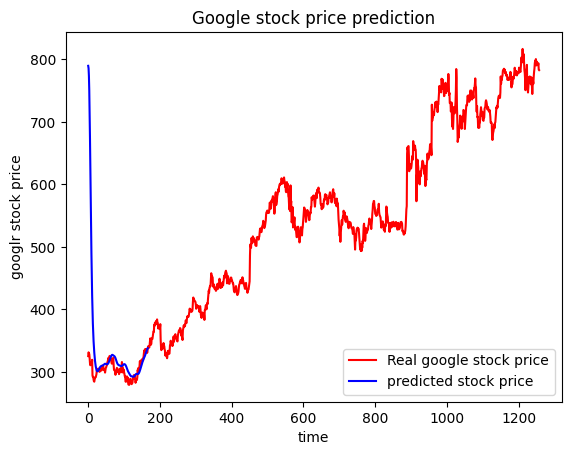

In [ ]:
# Visualizing the results for GRU
plt.plot(real_stock_price, color = 'red', label='Real google stock price')
plt.plot(GRU_predicted_stock_price, color = 'blue', label = 'predicted stock price')
plt.title('Google stock price prediction')
plt.xlabel('time')
plt.ylabel('googlr stock price')
plt.legend()
plt.show()

In [ ]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional, BatchNormalization

In [ ]:
model4=Sequential()
model4.add(Bidirectional(LSTM(100,return_sequences=True,activation='relu',input_shape=(1,60))))
model4.add(Bidirectional(LSTM(50,return_sequences=True,dropout=0.5)))
model4.add(Bidirectional(LSTM(50,dropout=0.5)))
model4.add(BatchNormalization(momentum=0.6))
model4.add(Dense(1))

In [ ]:
model4.compile(loss='mean_squared_error',optimizer='rmsprop')

In [ ]:
model4.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 21s 234ms/step - loss: 0.1924
Epoch 2/20
38/38 [==============================] - 10s 260ms/step - loss: 0.0169
Epoch 3/20
38/38 [==============================] - 10s 262ms/step - loss: 0.0112
Epoch 4/20
38/38 [==============================] - 9s 239ms/step - loss: 0.0072
Epoch 5/20
38/38 [==============================] - 9s 245ms/step - loss: 0.0066
Epoch 6/20
38/38 [==============================] - 10s 268ms/step - loss: 0.0072
Epoch 7/20
38/38 [==============================] - 10s 267ms/step - loss: 0.0061
Epoch 8/20
38/38 [==============================] - 9s 230ms/step - loss: 0.0052
Epoch 9/20
38/38 [==============================] - 10s 249ms/step - loss: 0.0052
Epoch 10/20
38/38 [==============================] - 10s 266ms/step - loss: 0.0053
Epoch 11/20
38/38 [==============================] - 11s 280ms/step - loss: 0.0061
Epoch 12/20
38/38 [==============================] - 10s 267ms/step - loss: 0.0052
Epoch 13/20
38/3